In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [85]:
df=pd.read_csv("HCAHPS_Hospital.csv",encoding='latin1')

In [17]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,NaN,12,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,NaN,22,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [37]:
df.shape

(264990, 22)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
Provider ID                              264990 non-null int64
Hospital Name                            264990 non-null object
Address                                  264990 non-null object
City                                     264990 non-null object
State                                    264990 non-null object
ZIP Code                                 264990 non-null int64
County Name                              264165 non-null object
Phone Number                             264990 non-null int64
HCAHPS Measure ID                        264990 non-null object
HCAHPS Question                          264990 non-null object
HCAHPS Answer Description                264990 non-null object
Patient Survey Star Rating               264990 non-null object
Patient Survey Star Rating Footnote      15720 non-null object
HCAHPS Answer Percent                    264990 non-null obje

In [38]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID                               0.00
Hospital Name                             0.00
Address                                   0.00
City                                      0.00
State                                     0.00
ZIP Code                                  0.00
County Name                               0.31
Phone Number                              0.00
HCAHPS Measure ID                         0.00
HCAHPS Question                           0.00
HCAHPS Answer Description                 0.00
Patient Survey Star Rating                0.00
Patient Survey Star Rating Footnote      94.07
HCAHPS Answer Percent                     0.00
HCAHPS Answer Percent Footnote           83.38
HCAHPS Linear Mean Value                  0.00
Number of Completed Surveys               0.00
Number of Completed Surveys Footnote     88.02
Survey Response Rate Percent              0.00
Survey Response Rate Percent Footnote    71.42
Measure Start Date                        0.00
Measure End D

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [87]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(264990, 18)

In [88]:
df=df.dropna(axis=0, how='any')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264165 entries, 0 to 264989
Data columns (total 18 columns):
Provider ID                     264165 non-null int64
Hospital Name                   264165 non-null object
Address                         264165 non-null object
City                            264165 non-null object
State                           264165 non-null object
ZIP Code                        264165 non-null int64
County Name                     264165 non-null object
Phone Number                    264165 non-null int64
HCAHPS Measure ID               264165 non-null object
HCAHPS Question                 264165 non-null object
HCAHPS Answer Description       264165 non-null object
Patient Survey Star Rating      264165 non-null object
HCAHPS Answer Percent           264165 non-null object
HCAHPS Linear Mean Value        264165 non-null object
Number of Completed Surveys     264165 non-null object
Survey Response Rate Percent    264165 non-null object
Measure Star

In [89]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264165 entries, 0 to 264989
Data columns (total 18 columns):
Provider ID                     264165 non-null int64
Hospital Name                   264165 non-null object
Address                         264165 non-null object
City                            264165 non-null object
State                           264165 non-null object
ZIP Code                        264165 non-null int64
County Name                     264165 non-null object
Phone Number                    264165 non-null int64
HCAHPS Measure ID               264165 non-null object
HCAHPS Question                 264165 non-null object
HCAHPS Answer Description       264165 non-null object
Patient Survey Star Rating      264165 non-null object
HCAHPS Answer Percent           264165 non-null object
HCAHPS Linear Mean Value        264165 non-null object
Number of Completed Surveys     264165 non-null object
Survey Response Rate Percent    264165 non-null object
Measure Star

### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [90]:
df=df[~((df["Patient Survey Star Rating"].isin(['Not Applicable','Not Available'])) & (df["HCAHPS Answer Percent"].isin(['Not Applicable','Not Available'])) & (df["HCAHPS Linear Mean Value"].isin(['Not Applicable','Not Available'])))]


In [91]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215896 entries, 0 to 264659
Data columns (total 14 columns):
Provider ID                     215896 non-null int64
Hospital Name                   215896 non-null object
ZIP Code                        215896 non-null int64
County Name                     215896 non-null object
HCAHPS Measure ID               215896 non-null object
HCAHPS Question                 215896 non-null object
HCAHPS Answer Description       215896 non-null object
Patient Survey Star Rating      215896 non-null object
HCAHPS Answer Percent           215896 non-null object
HCAHPS Linear Mean Value        215896 non-null object
Number of Completed Surveys     215896 non-null object
Survey Response Rate Percent    215896 non-null object
Measure Start Date              215896 non-null object
Measure End Date                215896 non-null object
dtypes: int64(2), object(12)
memory usage: 24.7+ MB


### Converting some categorical variables to numeric

In [93]:
df = df.replace(['Not Available','Not Applicable'],0)

In [95]:
df[["Patient Survey Star Rating","HCAHPS Answer Percent","HCAHPS Linear Mean Value","Number of Completed Surveys","Survey Response Rate Percent"]] = df[["Patient Survey Star Rating","HCAHPS Answer Percent","HCAHPS Linear Mean Value","Number of Completed Surveys","Survey Response Rate Percent"]].apply(pd.to_numeric,errors='coerce')

In [97]:
df=df.fillna(0)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215896 entries, 0 to 264659
Data columns (total 14 columns):
Provider ID                     215896 non-null int64
Hospital Name                   215896 non-null object
ZIP Code                        215896 non-null int64
County Name                     215896 non-null object
HCAHPS Measure ID               215896 non-null object
HCAHPS Question                 215896 non-null object
HCAHPS Answer Description       215896 non-null object
Patient Survey Star Rating      215896 non-null int64
HCAHPS Answer Percent           215896 non-null int64
HCAHPS Linear Mean Value        215896 non-null int64
Number of Completed Surveys     215896 non-null float64
Survey Response Rate Percent    215896 non-null int64
Measure Start Date              215896 non-null object
Measure End Date                215896 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 24.7+ MB


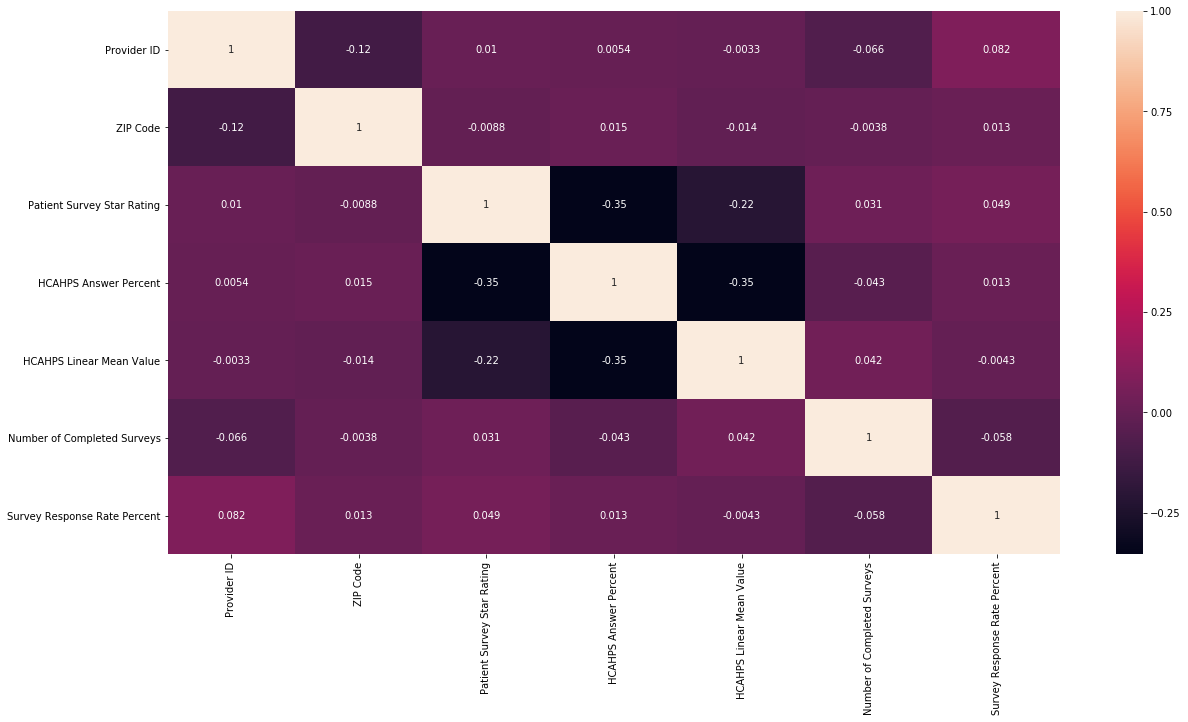

In [99]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [104]:
df.to_csv('HCAHPS.csv')

In [103]:
HCAHPS = df[:]
HCAHPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215896 entries, 0 to 264659
Data columns (total 14 columns):
Provider ID                     215896 non-null int64
Hospital Name                   215896 non-null object
ZIP Code                        215896 non-null int64
County Name                     215896 non-null object
HCAHPS Measure ID               215896 non-null object
HCAHPS Question                 215896 non-null object
HCAHPS Answer Description       215896 non-null object
Patient Survey Star Rating      215896 non-null int64
HCAHPS Answer Percent           215896 non-null int64
HCAHPS Linear Mean Value        215896 non-null int64
Number of Completed Surveys     215896 non-null float64
Survey Response Rate Percent    215896 non-null int64
Measure Start Date              215896 non-null object
Measure End Date                215896 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 24.7+ MB
